In [1]:
import factorloader, utils
import stockdownload as dl
import evaluationtools as evaluate
import matplotlib.pyplot as plt

# 下载数据

In [2]:
code = "000905"
start = '2018-01-01'
end = '2023-05-31'
data = dl.download_domestic_index_data(code, start, end)
data

,date,open,close,high,low,volume,turnover,amplitude,quote change,change amount,turnover rate,symbol
0,2018-01-02,6263.15,6332.23,6332.61,6258.16,73032236,8.815399e+10,1.19,1.30,81.41,0.63,000905
1,2018-01-03,6331.72,6388.25,6391.98,6324.26,83936745,1.034547e+11,1.07,0.88,56.02,0.73,000905
2,2018-01-04,6380.27,6417.54,6418.26,6375.51,80543690,1.029297e+11,0.67,0.46,29.29,0.70,000905
3,2018-01-05,6414.77,6417.25,6435.85,6397.29,81581018,9.764230e+10,0.60,0.00,-0.29,0.71,000905
4,2018-01-08,6413.87,6446.18,6446.79,6393.88,89476928,1.063896e+11,0.82,0.45,28.93,0.77,000905
...,...,...,...,...,...,...,...,...,...,...,...,...
1308,2023-05-25,6000.22,5988.19,6028.64,5926.20,109922832,1.267692e+11,1.71,-0.29,-17.60,0.95,000905
1309,2023-05-26,5983.14,6034.98,6045.13,5953.88,106381588,1.232630e+11,1.52,0.78,46.79,0.92,000905
1310,2023-05-29,6046.54,6025.16,6058.92,6012.40,125139417,1.468083e+11,0.77,-0.16,-9.82,1.08,000905
1311,2023-05-30,6008.46,6061.31,6061.31,5960.34,127312017,1.518491e+11,1.68,0.60,36.15,1.10,000905


# 计算因子

In [3]:
start = '2018-01-01'
end = '2023-05-31'
factor = factorloader.single_main(code, start, end, factor_num = '0002', evaluation=True)
factor

,date,factor
0,2018-01-02,0.010969
1,2018-01-03,0.008888
2,2018-01-04,0.005824
3,2018-01-05,0.000387
4,2018-01-08,0.005025
...,...,...
1308,2023-05-25,-0.002007
1309,2023-05-26,0.008627
1310,2023-05-29,-0.003542
1311,2023-05-30,0.008757


# 因子预处理

In [4]:
def pre(factor):
    
    # normalize first then standardize, its order changes new factor a lot
    f = utils.normalize(factor['factor'])
    f = utils.standardize(f)

    factor['factor'] = f

    return factor

In [5]:
factor = pre(factor)
factor

d:\nri_research\ts-market-timing\utils\preprocessing.py:73: RuntimeWarning: invalid value encountered in divide
  result = (np.array(s) - np.array(rolling_min)) / (np.array(rolling_max) - np.array(rolling_min))
d:\nri_research\ts-market-timing\utils\preprocessing.py:50: RuntimeWarning: invalid value encountered in divide
  result = (np.array(s) - np.array(rolling_mean)) / np.array(rolling_std)


,date,factor
0,2018-01-02,0.000000
1,2018-01-03,0.000000
2,2018-01-04,0.000000
3,2018-01-05,0.000000
4,2018-01-08,1.500000
...,...,...
1308,2023-05-25,0.110034
1309,2023-05-26,1.420331
1310,2023-05-29,-0.118424
1311,2023-05-30,1.384442


# 评估因子

## 因子特性分析

<Figure size 640x500 with 0 Axes>

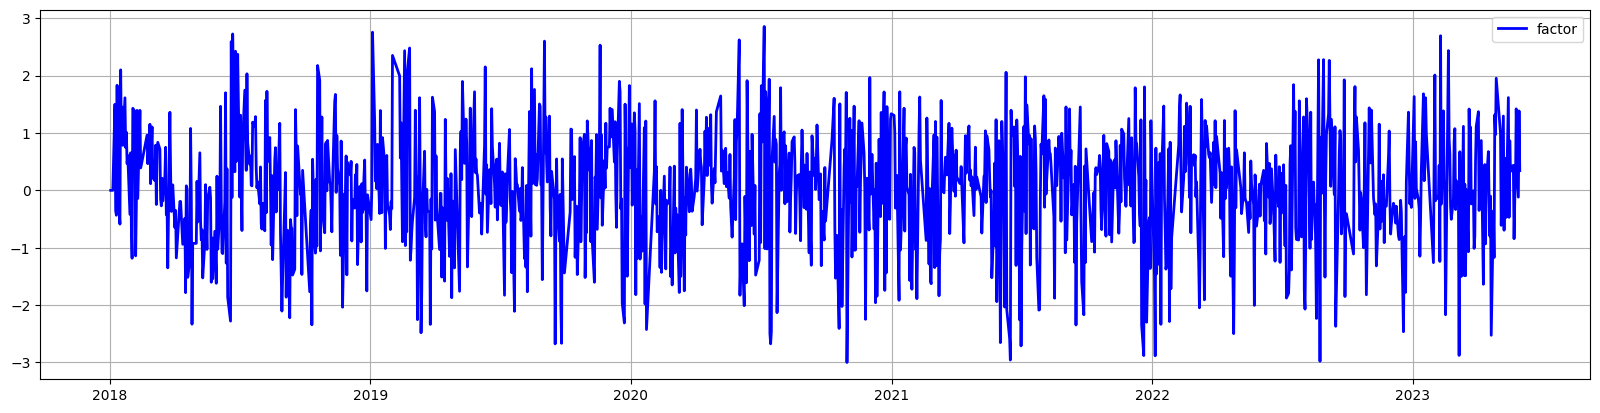

<Figure size 640x500 with 0 Axes>

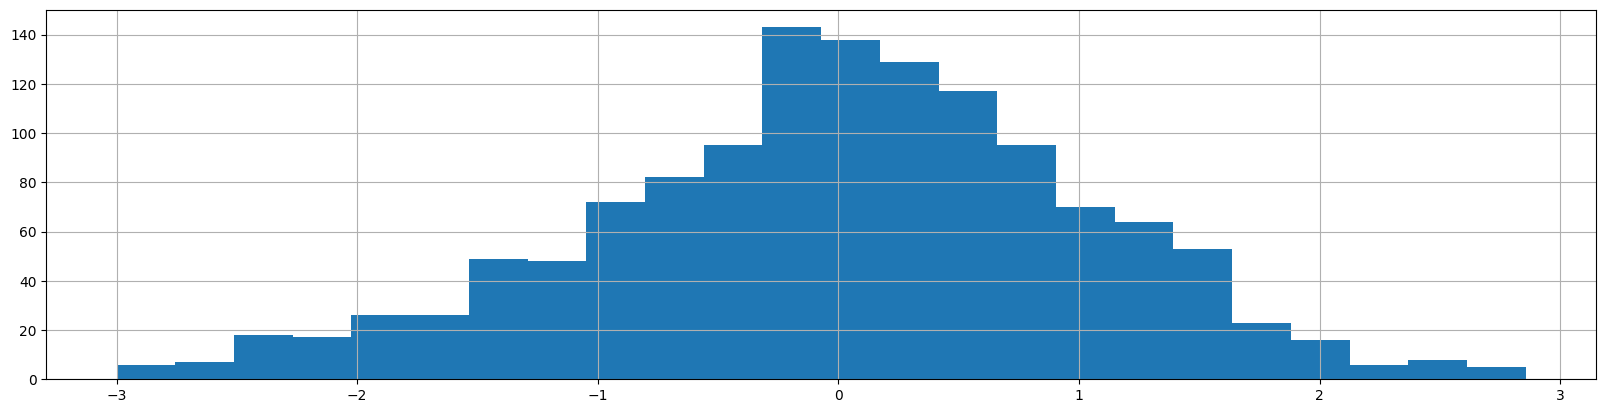

In [6]:
evaluate.distribution(factor)

--- K-S Test Results ---
Statistic: 0.0398
p value: 0.0302


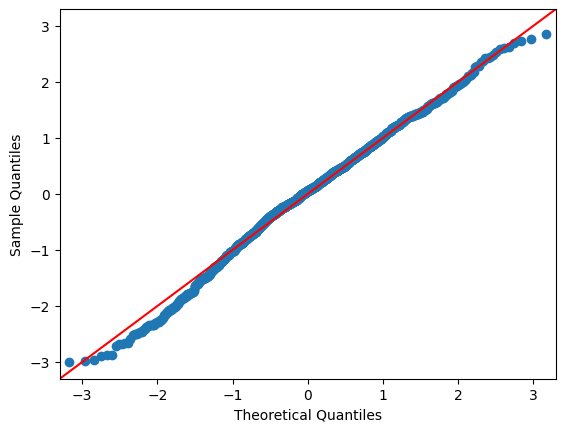

In [7]:
result = evaluate.if_normal(factor, plot=True)

<Figure size 640x500 with 0 Axes>

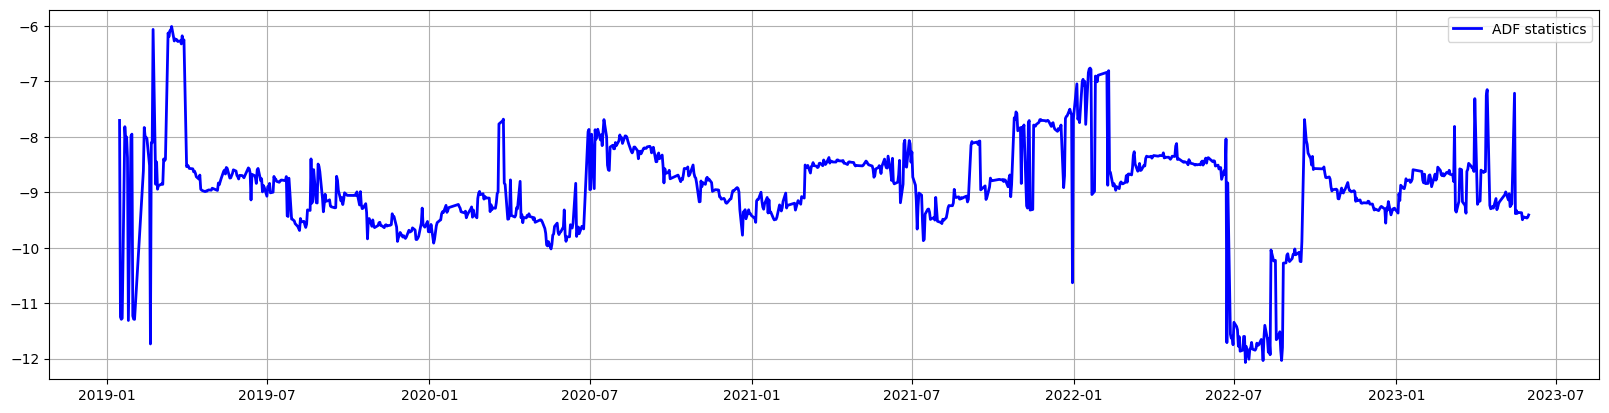

<Figure size 640x500 with 0 Axes>

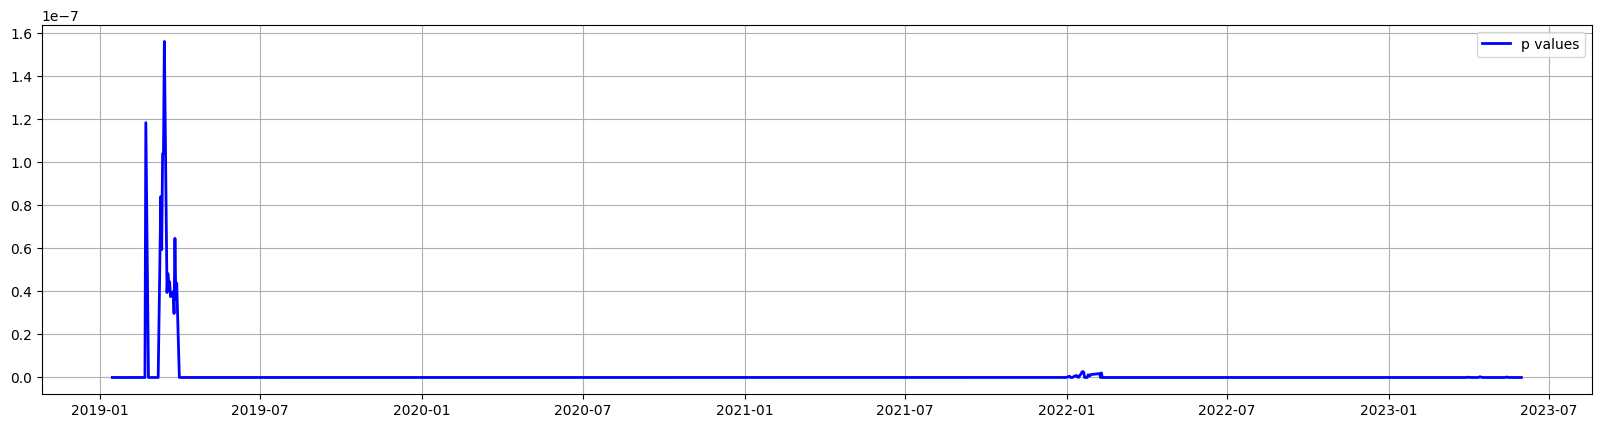

In [8]:
adf, p_value, critical_values = evaluate.adf_test(factor, win=252, plot=True)

d:\nri_research\ts-market-timing\evaluationtools\evaluation.py:114: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  tmp_kps, tmp_p_value, tmp_n_lags, tmp_critical_values = kpss(df.values)
d:\nri_research\ts-market-timing\evaluationtools\evaluation.py:114: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  tmp_kps, tmp_p_value, tmp_n_lags, tmp_critical_values = kpss(df.values)
d:\nri_research\ts-market-timing\evaluationtools\evaluation.py:114: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  tmp_kps, tmp_p_value, tmp_n_lags, tmp_critical_values = kpss(df.values)
d:\nri_research\ts-market-timing\evaluationtools\evaluation.py:114: Inter

<Figure size 640x500 with 0 Axes>

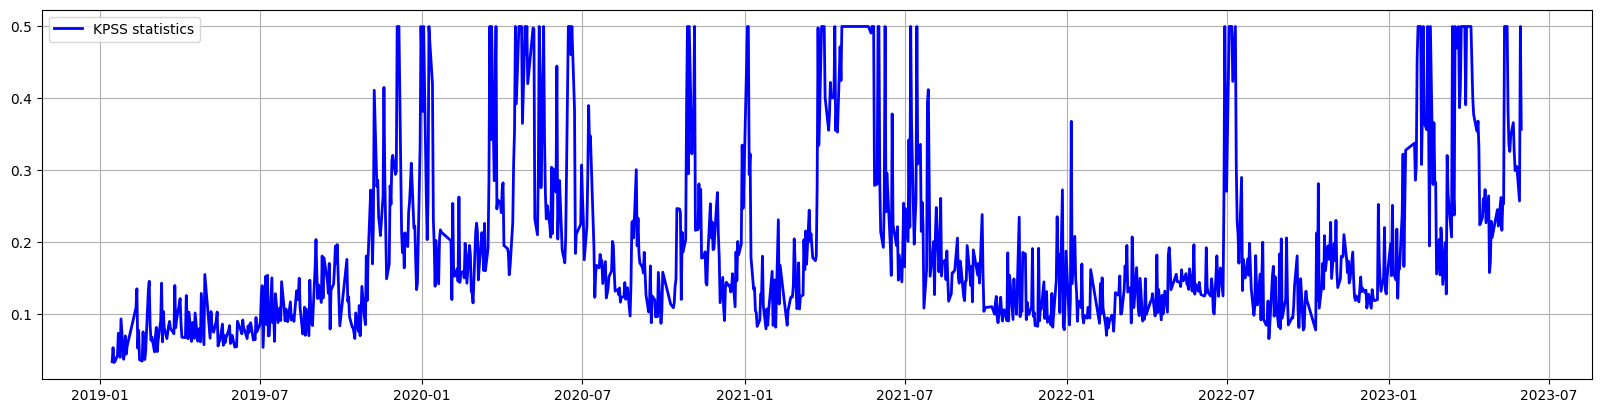

<Figure size 640x500 with 0 Axes>

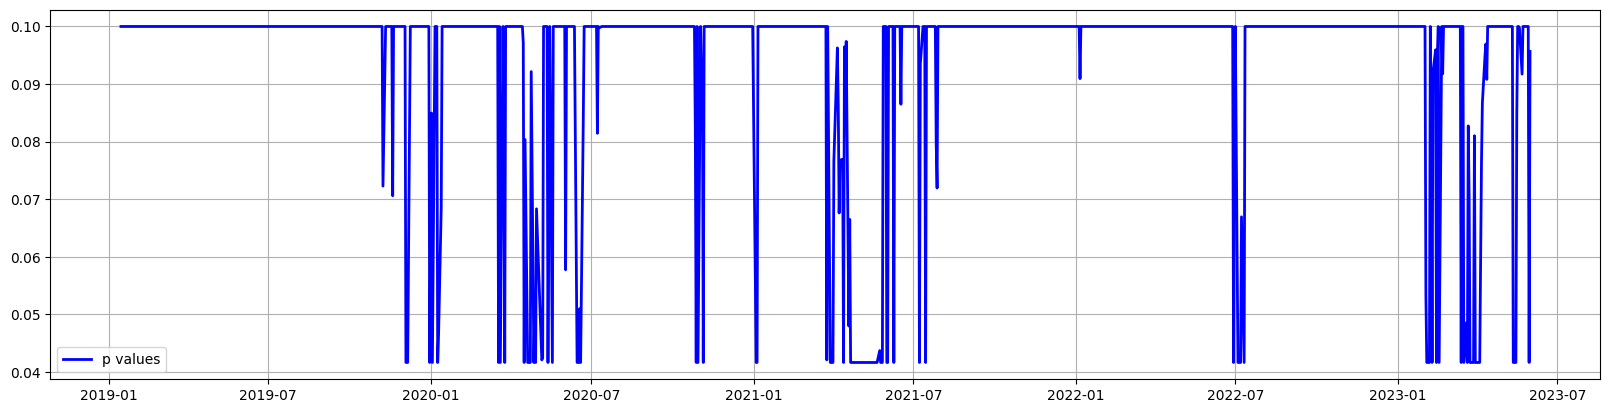

In [9]:
kpss, p_value, n_lags, critical_values = evaluate.kpss_test(factor, win=252, plot=True)

## IC 检测

<Figure size 640x500 with 0 Axes>

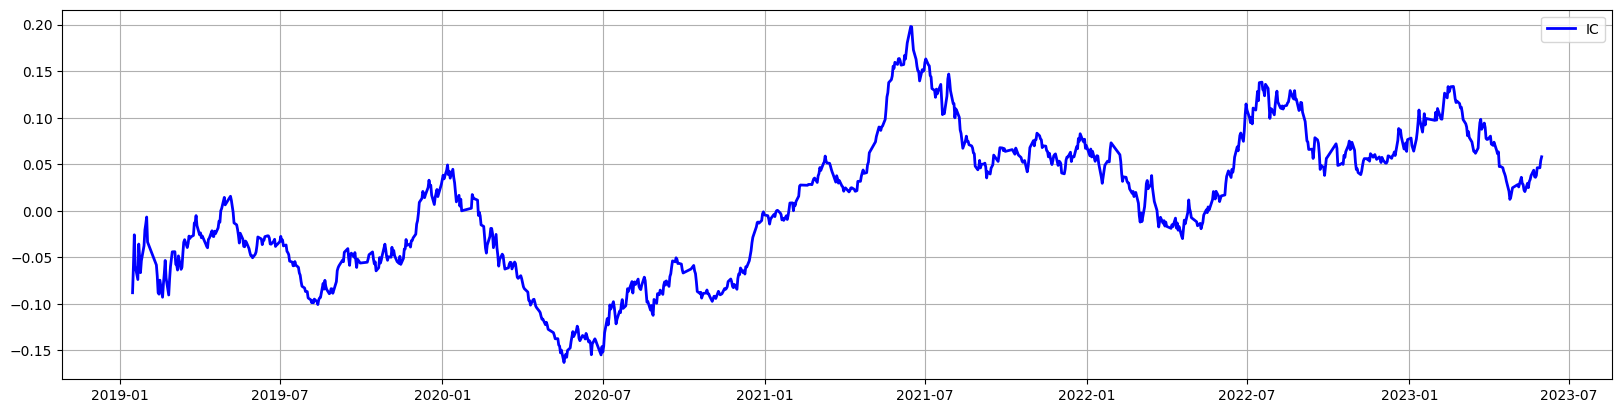

In [10]:
ic = evaluate.ic_test(data, factor, win = 252, plot=True) # 计算IC统计量

## 因果分析

c:\Users\zhaoxw\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


<Figure size 640x500 with 0 Axes>

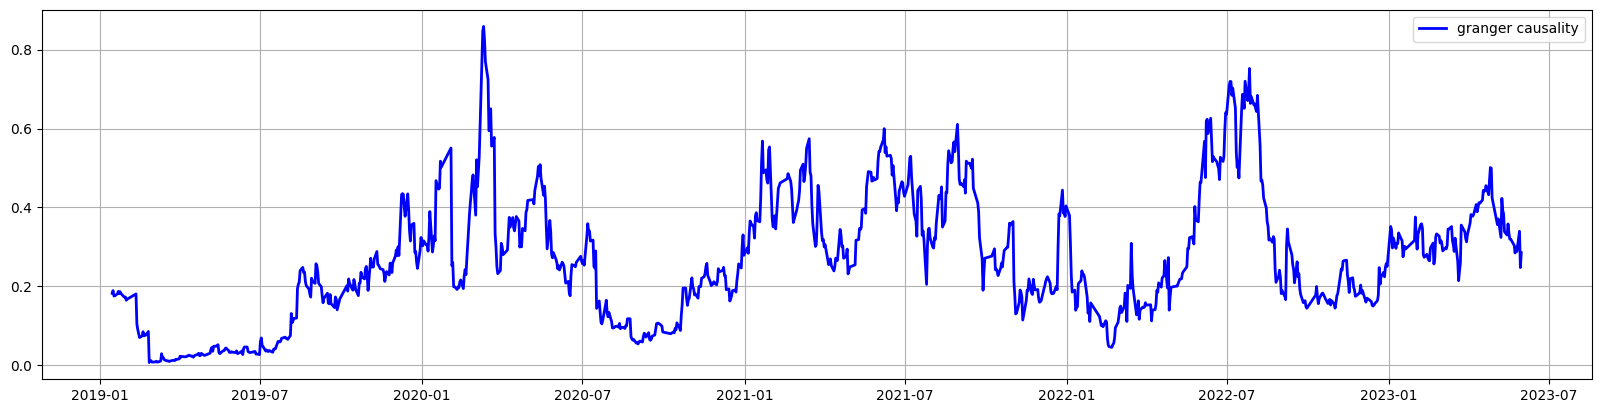

In [11]:
result = evaluate.grangers_causation_matrix(data,factor, test='ssr_chi2test', maxlag=15, win=252, plot=True)

# 因子回测

In [15]:
bound = evaluate.cal_bound(factor, switch='rolling')

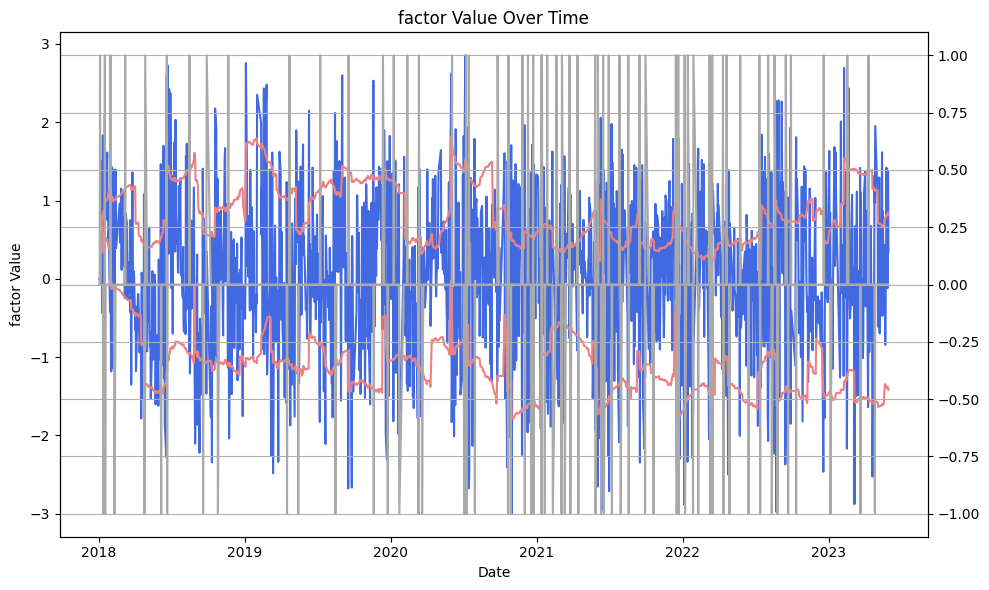

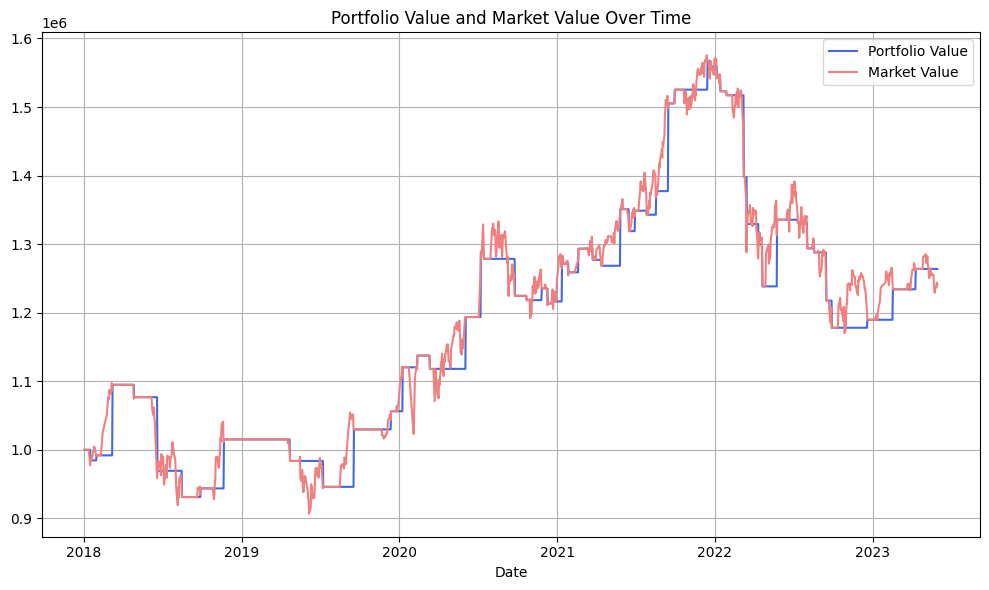

--- Portfolio Summary ---
Cash: 0.0
Positions:
000905: 205.23983784192748
--- Performance Metrics ---
Total Returns: 26.39%
Annualized Returns: 4.60%
Volatility: 13.97%
Sharpe Ratio: 0.19
Total P&L: 76.45
Average Trade Return: 0.08%
Win Ratio: 48.21%


In [16]:
# sell signal: -1, buy signal: 1
annual_ret = evaluate.backtest_main(data, factor, bound, upperbound = 'buy', plot=True)

# 分层分析

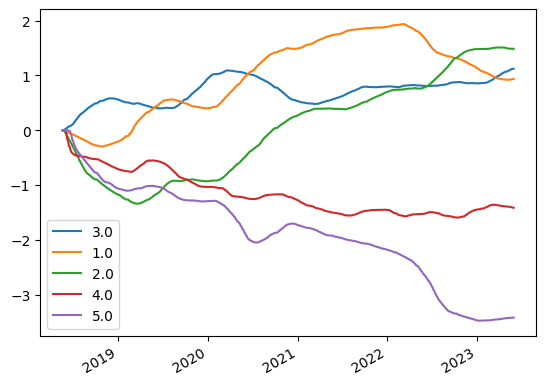

In [14]:
engine = evaluate.LayeredBacktestingEngine(data, factor, window=90, n_group=5, ret_period=1)
cret_group = engine.cal_roll_res_list()
cret_group.plot.line()
plt.show()